# Multi-Class Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

Loading Iris Dataset

In [2]:
iris=pd.read_csv('/content/iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Task 1: Create predictors and label**

In [4]:
# Write Code Here

X = iris.drop(columns=['Id', 'Species'])
Y = iris['Species']

# Display the shapes of X and Y to confirm the split
X.shape, Y.shape


((150, 4), (150,))

**Task 2: Split the data with test size 30 and random state 25**

In [5]:
from sklearn.model_selection import train_test_split

In [7]:
# Split the data into training and testing sets with a test size of 30 and random state of 25
from sklearn.model_selection import train_test_split

# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=30, random_state=25)

# Display the shapes of the split data
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape



((120, 4), (30, 4), (120,), (30,))

**Task 3: Define the model for Random Forest classifier**

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
# Write the code here
# Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Defining the Random Forest model
rf_model = RandomForestClassifier(random_state=25)

# Display the model
rf_model


RandomForestClassifier(random_state=25)

**Task 4: Train the model**

In [10]:
# Write the code here
# Train the Random Forest model on the training data
rf_model.fit(X_train, Y_train)

# Displaying a confirmation message after training
"Model trained successfully."


'Model trained successfully.'

**Task 5: Get the predictions**

In [11]:
# Write the code here
# Getting predictions for the test set
Y_pred = rf_model.predict(X_test)

# Display the predictions
Y_pred


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa'], dtype=object)

**Task 6: Find the accuracy**

In [12]:
from sklearn.metrics import accuracy_score

In [14]:
# Importing accuracy_score from sklearn to calculate the model accuracy
from sklearn.metrics import accuracy_score

# Calculating accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)

# Display the accuracy
accuracy


0.9333333333333333

**Task 7: Print Classification Report**

In [15]:
from sklearn.metrics import classification_report

In [16]:

# Generating the classification report
classification_rep = classification_report(Y_test, Y_pred)

# Displaying the classification report
classification_rep


'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00         9\nIris-versicolor       0.92      0.92      0.92        13\n Iris-virginica       0.88      0.88      0.88         8\n\n       accuracy                           0.93        30\n      macro avg       0.93      0.93      0.93        30\n   weighted avg       0.93      0.93      0.93        30\n'

### Creating confusion matrix

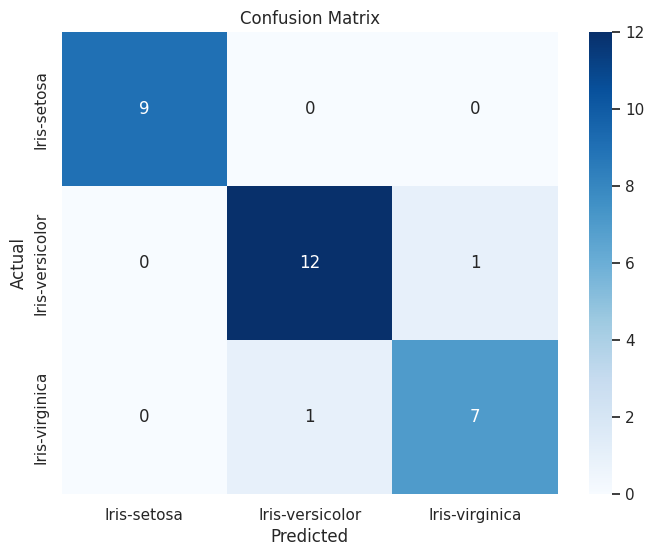

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generating the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


The confusion matrix shows the actual vs. predicted classifications for the three iris species. Here's the breakdown of the matrix:

- **Iris-setosa** (First row):
  - 9 instances of Iris-setosa were correctly predicted as Iris-setosa (True Positives).
  - 0 instances were misclassified as other species (False Negatives).

- **Iris-versicolor** (Second row):
  - 12 instances of Iris-versicolor were correctly predicted (True Positives).
  - 1 instance of Iris-versicolor was misclassified as Iris-virginica (False Negative).

- **Iris-virginica** (Third row):
  - 7 instances of Iris-virginica were correctly predicted (True Positives).
  - 1 instance was misclassified as Iris-versicolor (False Negative).

### Summary:
- **True Positives (correct predictions)** dominate across all species.
- There are minimal misclassifications, with only one Iris-versicolor classified as Iris-virginica and one Iris-virginica classified as Iris-versicolor.
- The overall performance is strong, which aligns with the 93.33% accuracy observed.
